## Data Visualization¶

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col=0, parse_dates=['Date'])
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [6]:
df = pd.read_csv('data/daily-minimum-temperatures.csv', parse_dates=['Date'])
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


#### Line Plot

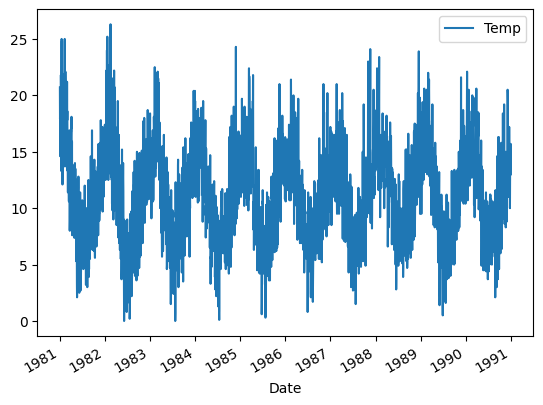

In [7]:
series.plot()
plt.show()

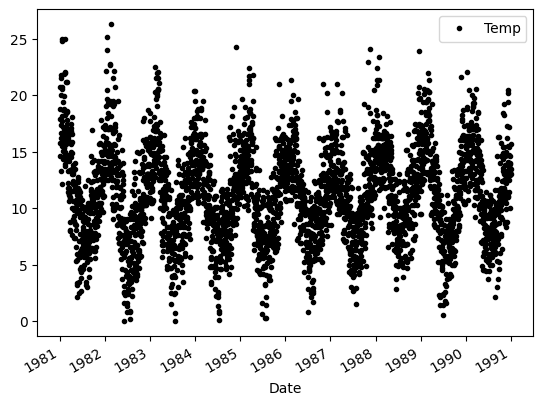

In [8]:
series.plot(style='k.') # 'k--'
plt.show()

#### Stacked Line Plot

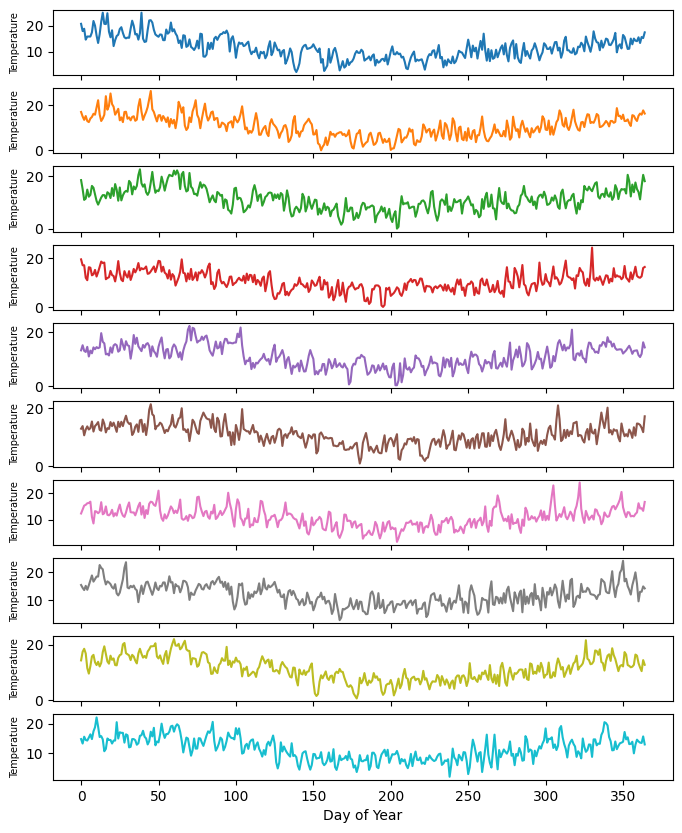

In [9]:
# create stacked line plots
df['Year'] = df['Date'].dt.year
groups = df.groupby('Year')
years = pd.DataFrame()
for name, group in groups:
    years[name] = group['Temp'].values

axes = years.plot(subplots=True, legend=False, figsize=(8, 10))
for ax in axes:
    ax.set_ylabel("Temperature", fontsize=7)
axes[-1].set_xlabel("Day of Year")
plt.show()

#### Histograms and Density Plots

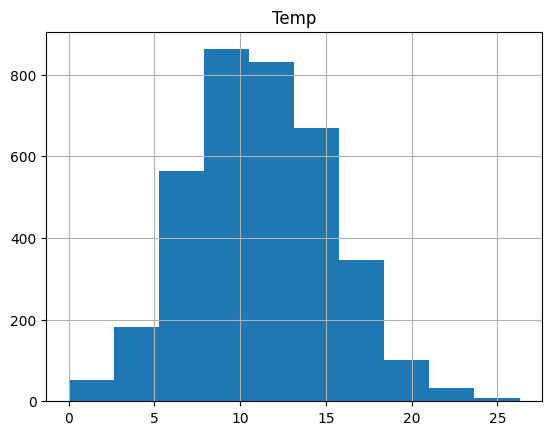

In [10]:
series.hist()
plt.show()

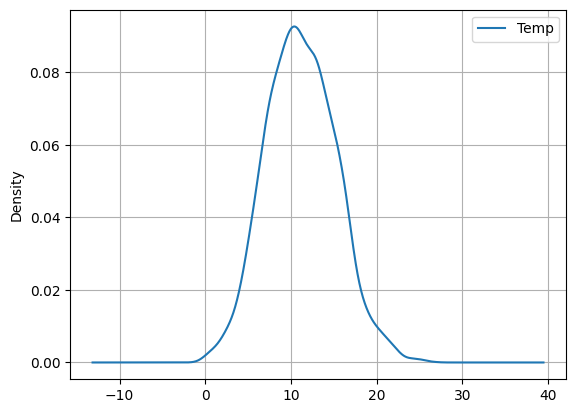

In [11]:
# create a density plot
series.plot(kind='kde')
plt.grid()
plt.show()

#### Box and Whisker Plots

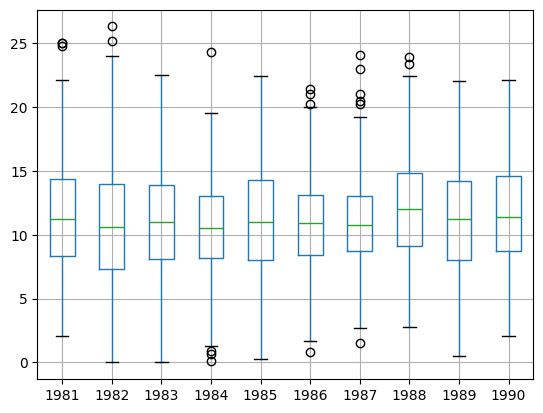

In [14]:
# create a boxplot of yearly data
groups = df.groupby('Year')
years = pd.DataFrame()
for name, group in groups:
  years[name] = group['Temp'].values

years.boxplot()
plt.show()

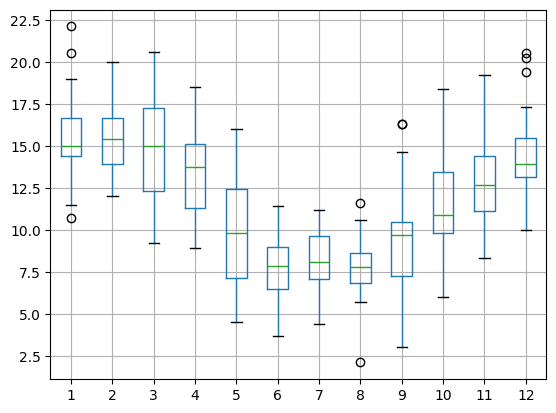

In [24]:
# create a boxplot of monthly data
df['Month'] = df['Date'].dt.month
one_year = df[df['Year'] == 1990]
groups = one_year.groupby('Month')
months = pd.concat([pd.DataFrame(group['Temp'].values) for name, group in groups], axis=1)
months.columns = range(1, 13)
months.boxplot()
plt.show()

#### Heat Maps

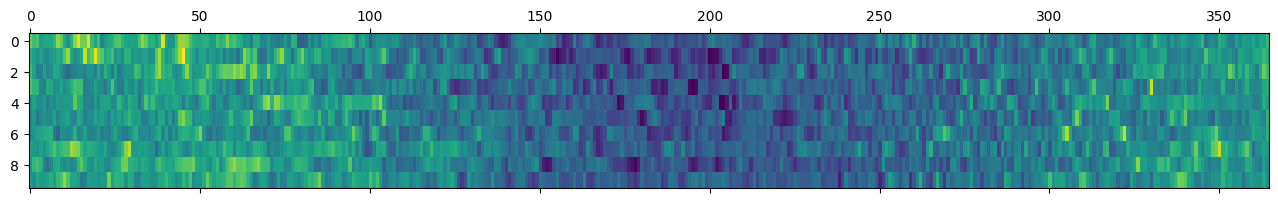

In [27]:
# create a heat map of yearly data
groups = df.groupby('Year')
years = pd.DataFrame()
for name, group in groups:
  years[name] = group['Temp'].values

years = years.T # each row represents one year and each column one day
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

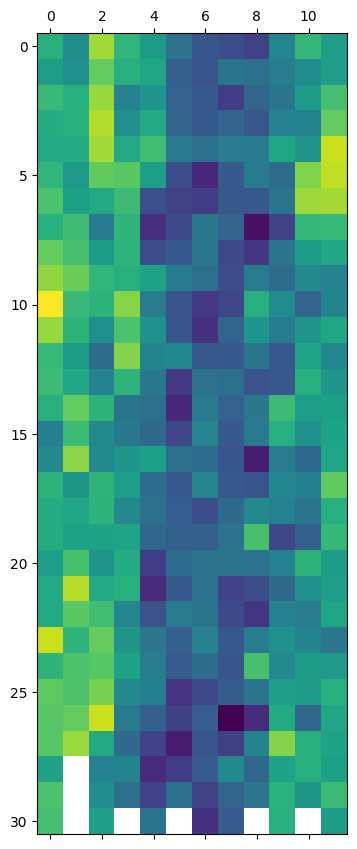

In [29]:
# create a heat map of monthly data
one_year = df[df['Year'] == 1990]
groups = one_year.groupby('Month')
months = pd.concat([pd.DataFrame(group['Temp'].values) for name, group in groups], axis=1)
months.columns = range(1, 13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

#### Lag Scatter Plots

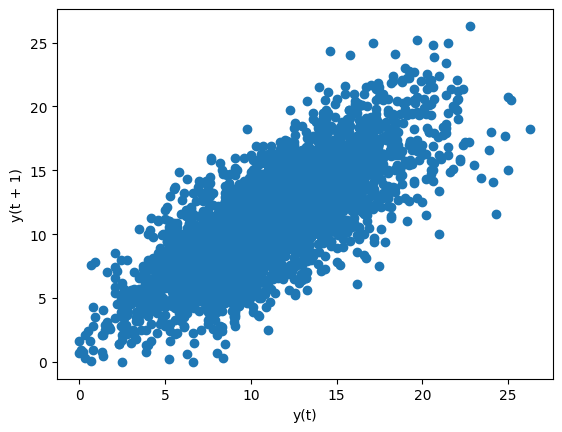

In [33]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

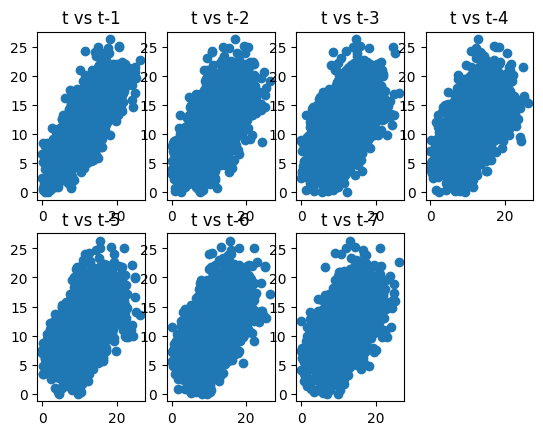

In [36]:
# create multiple scatter plots
lags = 7
columns_df = [df['Temp']]
columns = ['t']
for i in range(1, lags+1):
  columns_df.append(df['Temp'].shift(i))
  columns.append('t-' + str(i))
df_ = pd.concat(columns_df, axis=1)
df_.columns = columns
plt.figure(1)
for i in range(1, lags+1):
  ax = plt.subplot(240 + i) # the first digit → number of rows (nrows); the second digit → number of columns (ncols); the third digit → the position (index)
  ax.set_title('t vs t-' + str(i))
  plt.scatter(x=df_['t'].values, y=df_['t-'+str(i)].values)
plt.show()

#### Autocorrelation Plots

Dotted lines indicate any correltion values above thoese lines are statistically significant.

Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

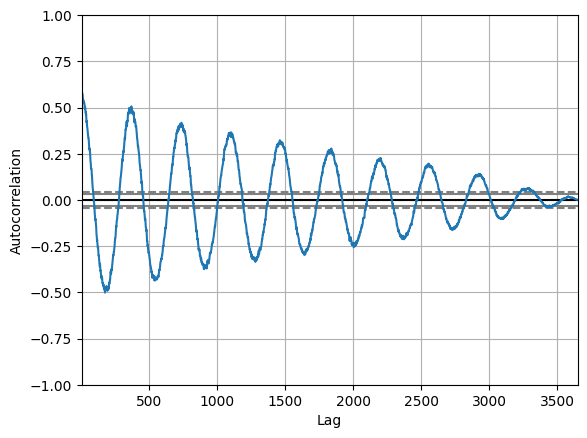

In [37]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()